In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# thư viện
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [ ]:
file_path = '/content/drive/MyDrive/PTDLL_Nhóm 13/code và data/DATA/df_new_cleaned.csv'
df = pd.read_csv(file_path)
# Hiển thị dữ liệu 15 dòng đầu
df.head(15)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Police Captain,Deputy Fire Chief,Transit Mgr,Cable Mechanic,Other
0,167411.1800,0.0000,11074.475,28628.62,209847.755,265945.985,2011,0,0,1,0,0
1,155966.0200,12408.2875,11074.475,28628.62,209847.755,265945.985,2011,1,0,0,0,0
2,184195.2875,12408.2875,11074.475,28628.62,209847.755,265945.985,2011,1,0,0,0,0
3,77916.0000,12408.2875,11074.475,28628.62,209847.755,265945.985,2011,0,0,0,1,0
4,134401.6000,9737.0000,11074.475,28628.62,209847.755,265945.985,2011,0,1,0,0,0
5,118602.0000,8601.0000,11074.475,28628.62,209847.755,265945.985,2011,0,0,0,0,1
6,92492.0100,12408.2875,11074.475,28628.62,209847.755,265945.985,2011,0,0,0,0,1
7,184195.2875,0.0000,11074.475,28628.62,209847.755,265945.985,2011,0,0,0,0,1
8,176932.6400,12408.2875,11074.475,28628.62,209847.755,265945.985,2011,0,0,0,0,1
9,184195.2875,0.0000,11074.475,28628.62,209847.755,265945.985,2011,0,0,0,0,1


In [ ]:
# Hiển thị thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143891 entries, 0 to 143890
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   BasePay            143891 non-null  float64
 1   OvertimePay        143891 non-null  float64
 2   OtherPay           143891 non-null  float64
 3   Benefits           143891 non-null  float64
 4   TotalPay           143891 non-null  float64
 5   TotalPayBenefits   143891 non-null  float64
 6   Year               143891 non-null  int64  
 7   Police Captain     143891 non-null  int64  
 8   Deputy Fire Chief  143891 non-null  int64  
 9   Transit Mgr        143891 non-null  int64  
 10  Cable Mechanic     143891 non-null  int64  
 11  Other              143891 non-null  int64  
dtypes: float64(6), int64(6)
memory usage: 13.2 MB


# **B2 : PHÂN TÍCH MÔ TẢ**

In [ ]:
# Chia dữ liệu làm 2 : Biến độc lập và biến phụ thuộc
X = df.drop(columns=['TotalPayBenefits'])
# Hiển thị dữ liệu chứa biến độc lập
X.head(10)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Year,Police Captain,Deputy Fire Chief,Transit Mgr,Cable Mechanic,Other
0,167411.1800,0.0000,11074.475,28628.62,209847.755,2011,0,0,1,0,0
1,155966.0200,12408.2875,11074.475,28628.62,209847.755,2011,1,0,0,0,0
2,184195.2875,12408.2875,11074.475,28628.62,209847.755,2011,1,0,0,0,0
3,77916.0000,12408.2875,11074.475,28628.62,209847.755,2011,0,0,0,1,0
4,134401.6000,9737.0000,11074.475,28628.62,209847.755,2011,0,1,0,0,0
5,118602.0000,8601.0000,11074.475,28628.62,209847.755,2011,0,0,0,0,1
6,92492.0100,12408.2875,11074.475,28628.62,209847.755,2011,0,0,0,0,1
7,184195.2875,0.0000,11074.475,28628.62,209847.755,2011,0,0,0,0,1
8,176932.6400,12408.2875,11074.475,28628.62,209847.755,2011,0,0,0,0,1
9,184195.2875,0.0000,11074.475,28628.62,209847.755,2011,0,0,0,0,1


In [ ]:
Y = pd.DataFrame(df['TotalPayBenefits'],columns=['TotalPayBenefits'])
# Hiển thị dữ liệu chứa biến phụ thuộc
Y.head(10)

,TotalPayBenefits
0,265945.985
1,265945.985
2,265945.985
3,265945.985
4,265945.985
5,265945.985
6,265945.985
7,265945.985
8,265945.985
9,265945.985


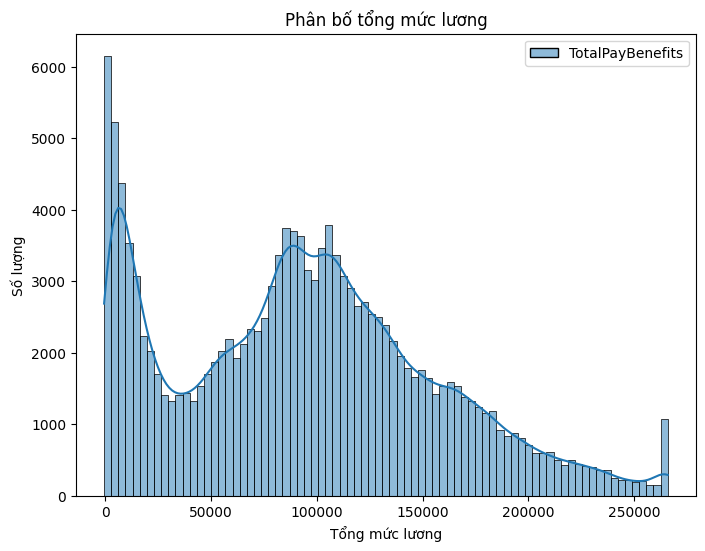

In [ ]:
#Biểu đồ thể hiện tổng mức lương
plt.figure(figsize=(8,6)) # kích thước
sns.histplot(Y, kde = True)
plt.xlabel('Tổng mức lương')
plt.ylabel('Số lượng')
plt.title('Phân bố tổng mức lương')
plt.show()

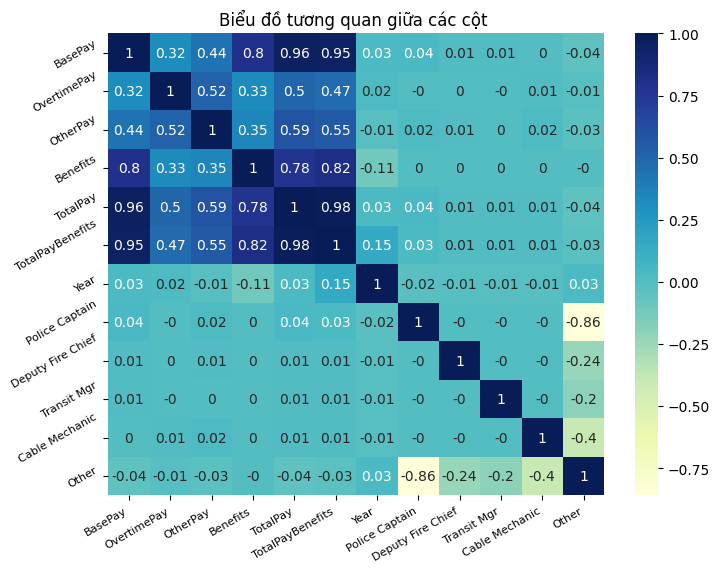

In [ ]:
# Biểu đồ tương quan giữa các cột
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True)
plt.xticks(rotation=30, ha='right', fontsize = 8) # Xoay nhãn
plt.yticks(rotation=30, ha='right', fontsize = 8)
plt.title('Biểu đồ tương quan giữa các cột ')
plt.show()

In [ ]:
# loại các cột Police Captain,	Deputy Fire Chief,	Transit Mgr,	Cable Mechanic,	Other để lập bảng mô tả
df_mo_ta = df.drop(columns = ['Police Captain','Deputy Fire Chief','Transit Mgr','Cable Mechanic','Other'])
# Lập bảng mô tả
Bang_mo_ta = df_mo_ta.describe()
Bang_mo_ta

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,143891.000000,143891.000000,143891.000000,143891.000000,143891.000000,143891.000000,143891.000000
mean,66072.589363,3045.294324,2805.430169,26480.344900,74783.105479,93923.264679,2012.524550
std,41903.888865,4543.579178,3723.216426,11918.985613,49671.869088,62136.978983,1.112468
min,-166.010000,-0.010000,-6644.685000,5422.400000,-618.130000,-618.130000,2011.000000
25%,34188.225000,0.000000,0.000000,22291.730000,36797.755000,44845.385000,2012.000000
50%,64965.870000,0.000000,894.030000,28628.620000,71439.120000,92661.450000,2013.000000
75%,94191.050000,4963.315000,4429.790000,33537.950000,106017.755000,133285.625000,2014.000000
max,184195.287500,12408.287500,11074.475000,50407.280000,209847.755000,265945.985000,2014.000000


In [ ]:
# Lưu bảng mô tả vào tệp
Bang_mo_ta.to_csv('/content/drive/MyDrive/PTDLL_Nhóm 13/code và data/DATA/Bang_mo_ta.txt',sep='\t')

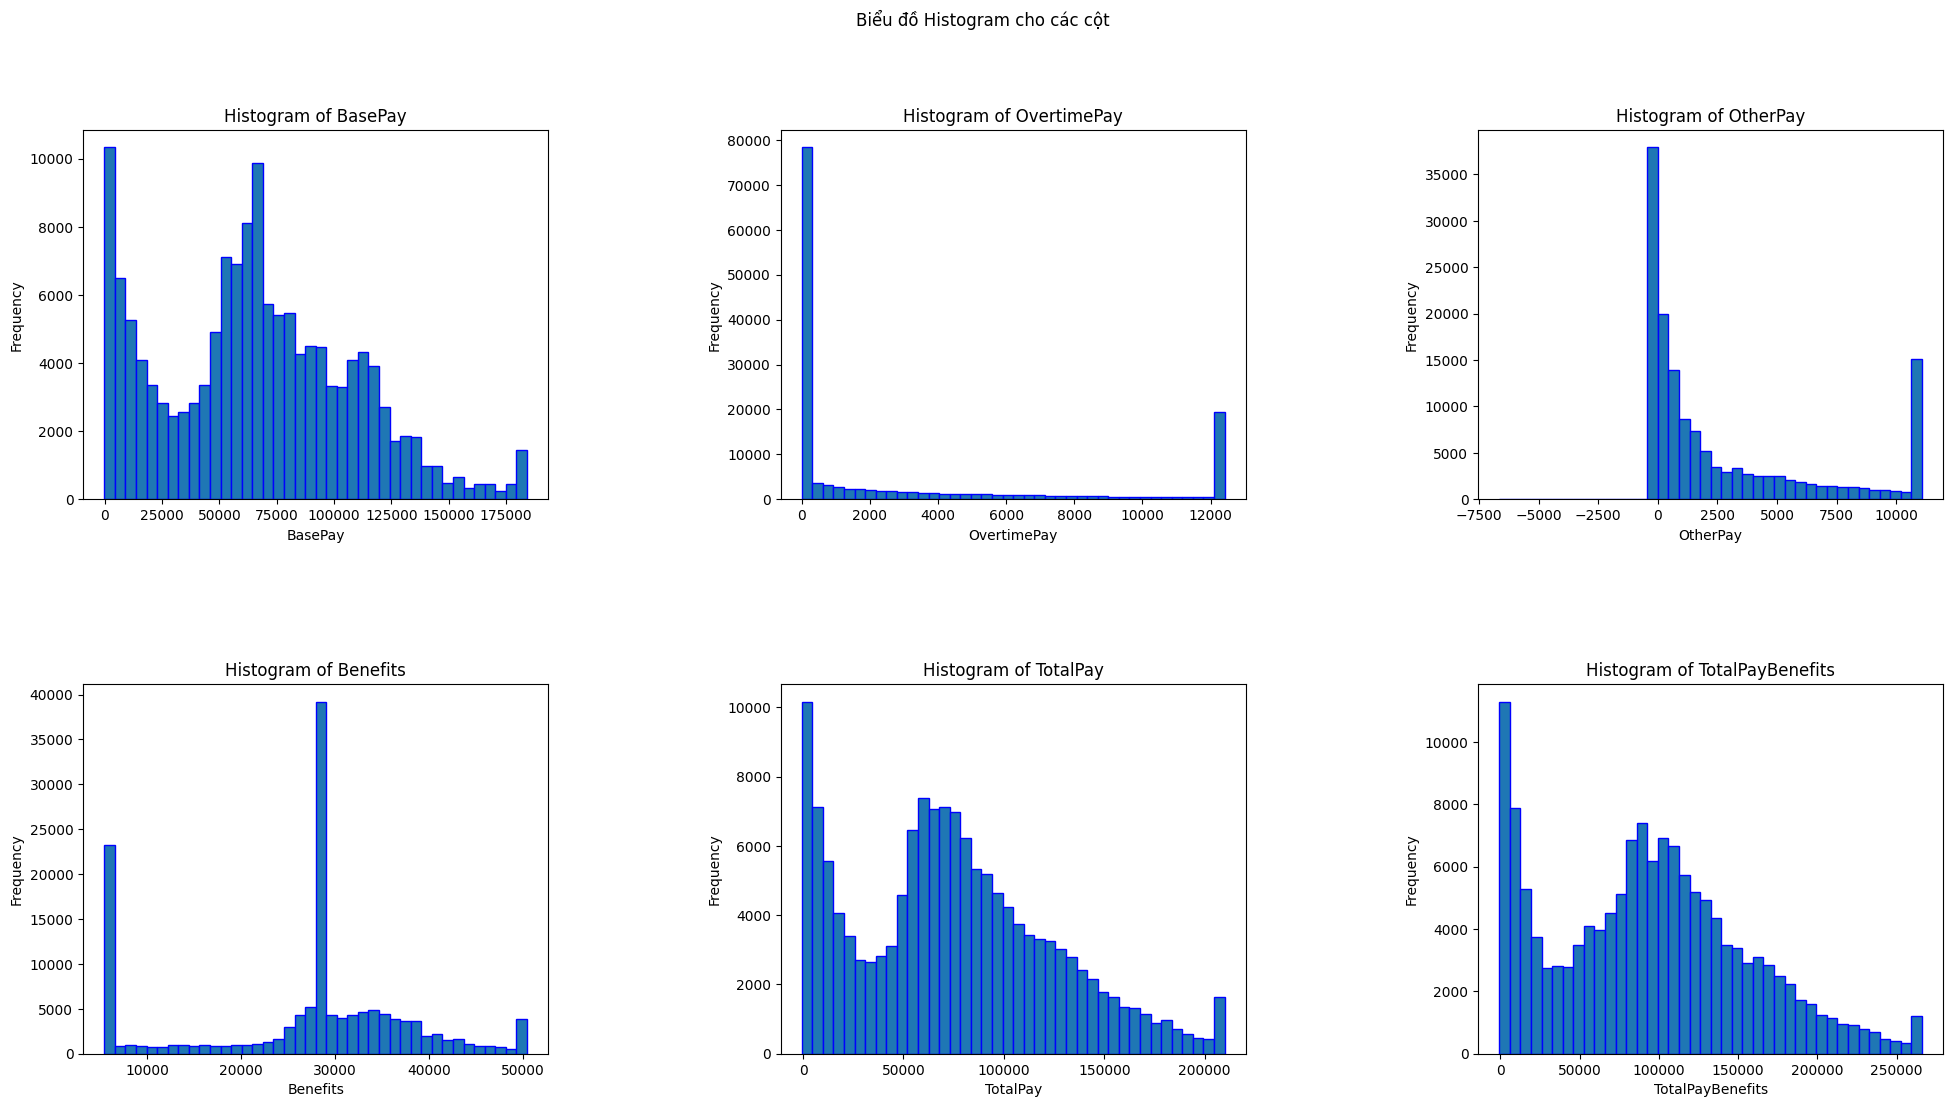

In [ ]:
# chuyển đổi dữ liệu sang dạng nguyên để vẽ biểu đồ histogram
df_hist = df_mo_ta.copy().astype(int)
# các cột cần vẽ
column_to_plot = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits']
fig, axes = plt.subplots(2, 3, figsize=(24, 12), gridspec_kw={'hspace': 0.5,'wspace' : 0.5})  # Tạo lưới 2x3 cho biểu đồ
fig.suptitle("Biểu đồ Histogram cho các cột")

# Lặp qua các cột trong DataFrame
for i, column in enumerate(column_to_plot):
    row = i // 3  # Xác định hàng của biểu đồ
    col = i % 3   # Xác định cột của biểu đồ

    axes[row, col].hist(df_hist[column], bins=40, edgecolor='b')
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(f'{column}')
    axes[row, col].set_ylabel('Frequency')

plt.show()

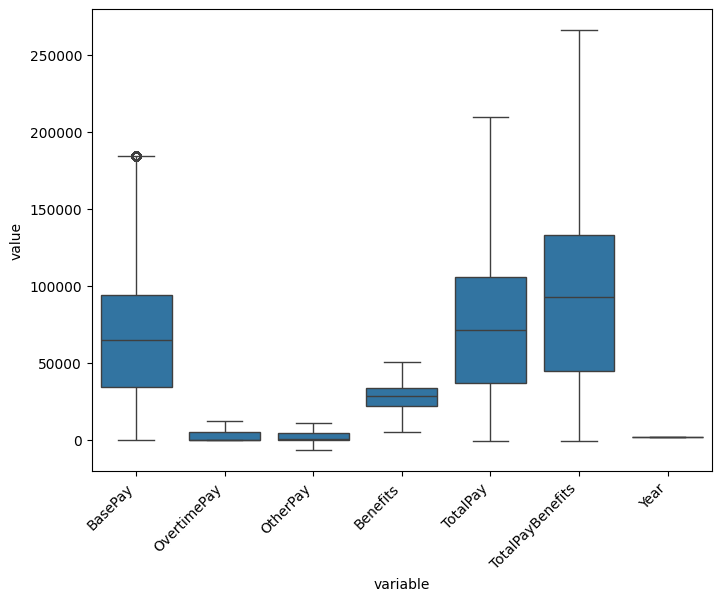

In [ ]:
# Vẽ biểu đồ Boxplot sử dụng seaborn
df_box = df.drop(columns=['Police Captain','Deputy Fire Chief','Transit Mgr','Cable Mechanic','Other'])
plt.figure(figsize=(8,6)) # kich thuoc
sns.boxplot(x = 'variable', y = 'value' , data = pd.melt(df_box))
plt.xticks(rotation=45, ha='right')
plt.show()

# **B3 : PHÂN TÍCH HỒI QUY TUYẾN TÍNH**

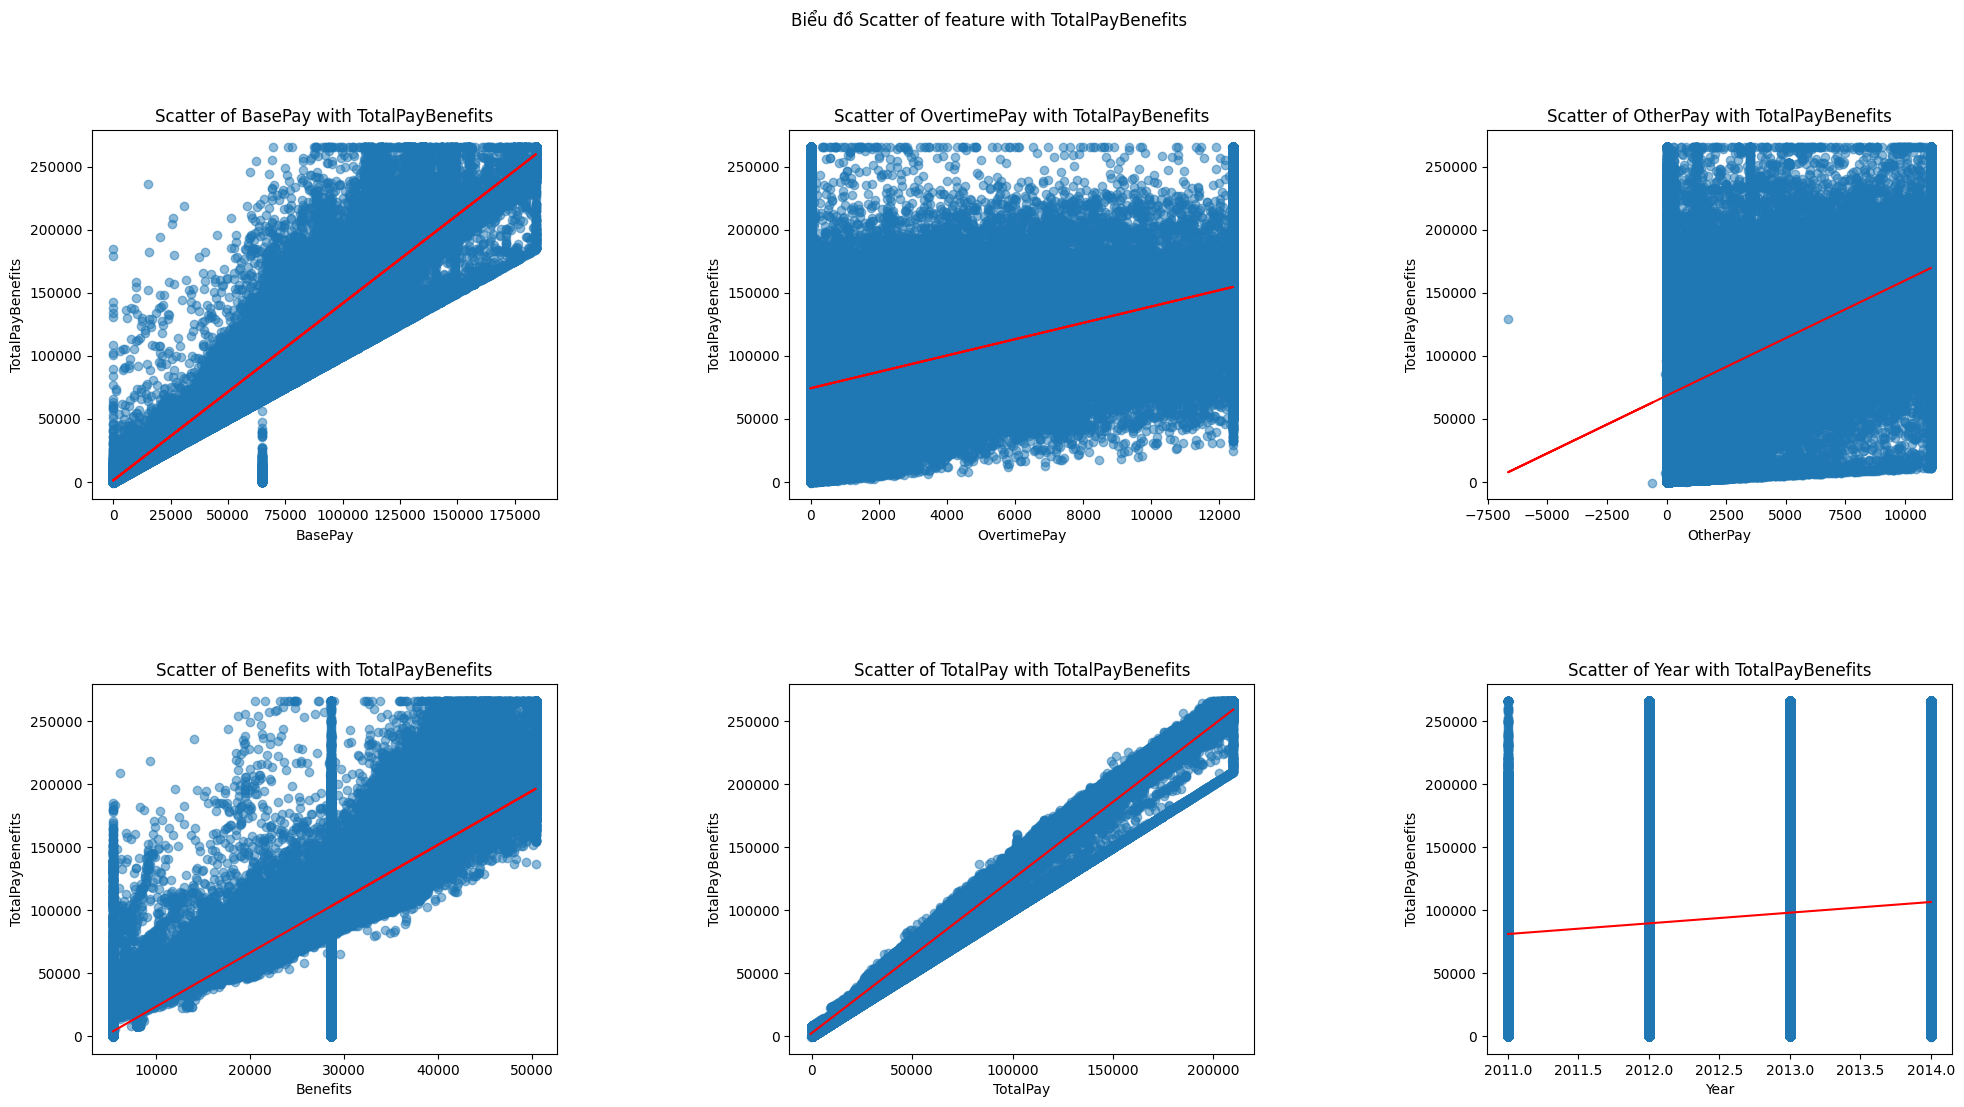

In [ ]:
# List các features trong X
features = ['BasePay','OvertimePay','OtherPay','Benefits','TotalPay', 'Year']
# features của Y
target = ['TotalPayBenefits']
# Tạo subplot
fig, axes = plt.subplots(2, 3, figsize=(24, 12), gridspec_kw={'hspace': 0.5,'wspace' : 0.5})  # Tạo lưới 2x3 cho biểu đồ
fig.suptitle("Biểu đồ Scatter of feature with TotalPayBenefits ")
# Vẽ biểu đồ Scatter
for i, feature in enumerate(features):
    row = i // 3  # Xác định hàng của biểu đồ
    col = i % 3   # Xác định cột của biểu đồ
    axes[row, col].scatter(X[feature], Y, alpha=0.5)
    axes[row, col].set_xlabel(f'{feature}')
    axes[row, col].set_ylabel('TotalPayBenefits')
    axes[row, col].set_title(f'Scatter of {feature} with TotalPayBenefits')
    # Tính hệ số của đường chân chính
    slope, intercept = np.polyfit(X[feature], Y, 1)
    # Vẽ đường chân chính
    axes[row, col].plot(X[feature], slope * X[feature] + intercept, color='red')


plt.show()

In [ ]:
# loại bỏ các cột có độ tuyến tính quá thấp và không cần thiết
df = df.drop(columns=['Year'])
X = X.drop(columns=['Year'])

In [ ]:
# chia dữ liệu thành các tệp huấn luyện (70 %) và test(30 %)
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=42)
# Kiểm tra kích thước của dữ liệu
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(100723, 10)
(43168, 10)
(100723, 1)
(43168, 1)


In [ ]:
# Dữ liệu x_train
x_train.head(10)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Police Captain,Deputy Fire Chief,Transit Mgr,Cable Mechanic,Other
120649,67177.23,12408.2875,3994.910,33392.52,85755.630,0,0,0,0,1
74365,92465.10,12408.2875,5040.660,33263.93,158652.400,0,0,0,0,1
5928,114118.43,0.0000,3109.350,28628.62,117227.780,0,0,0,0,1
78449,112990.54,0.0000,5287.920,36680.34,118278.460,0,0,0,0,1
71159,162916.26,12408.2875,11074.475,44770.10,209847.755,0,0,0,0,1
46173,65272.86,12408.2875,7483.800,39170.70,88365.910,0,0,0,0,1
121639,64528.35,10159.1200,5798.980,34477.88,80486.450,0,0,0,0,1
90747,67554.02,377.7000,888.000,25916.83,68819.720,0,0,0,0,1
84123,80187.66,3773.5700,7111.550,30229.40,91072.780,0,0,0,0,1
80397,85114.58,10987.6200,11074.475,31252.30,109250.970,0,0,0,0,1


In [ ]:
# Dữ liệu x_test
x_test.head(10)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,Police Captain,Deputy Fire Chief,Transit Mgr,Cable Mechanic,Other
1522,151553.96,0.0000,7257.48,28628.62,158811.44,0,0,0,0,1
12774,71180.51,1337.1000,10292.42,28628.62,82810.03,0,0,0,0,1
31418,6170.98,0.0000,0.00,28628.62,6170.98,0,0,0,0,1
58120,54492.50,0.0000,0.00,27169.97,54492.50,0,0,0,0,1
134131,32269.89,895.9500,3063.88,15565.84,36229.72,0,0,0,0,1
5874,99014.40,10596.2100,7981.98,28628.62,117592.59,0,0,0,0,1
127788,58715.87,1871.3500,4092.07,27367.43,64679.29,0,0,0,0,1
46184,86095.92,3459.1300,1736.03,36153.38,91291.08,0,0,0,0,1
105730,2495.08,0.0000,3.36,5422.40,2498.44,0,0,0,0,1
38223,88339.35,12408.2875,8736.08,38295.04,141400.43,0,0,0,0,1


In [ ]:
# Dữ liệu y_train
y_train.head(10)

,TotalPayBenefits
120649,119148.150
74365,191916.330
5928,117227.780
78449,154958.800
71159,265945.985
46173,127536.610
121639,114964.330
90747,94736.550
84123,121302.180
80397,140503.270


In [ ]:
# Dữ liệu y_test
y_test.head(10)

,TotalPayBenefits
1522,158811.44
12774,82810.03
31418,6170.98
58120,81662.47
134131,51795.56
5874,117592.59
127788,92046.72
46184,127444.46
105730,2523.42
38223,179695.47


In [ ]:
# chuẩn hóa Min Max
minmax_scale = MinMaxScaler()
x_train_scaled = minmax_scale.fit_transform(x_train)  # Chuẩn hóa tập huấn luyện
x_test_scaled = minmax_scale.transform(x_test)  # Chuẩn hóa tập kiểm tra
#Lưu MinMaxScaler vào tệp "minmax_scaler_x.pkl" bằng pickle
with open("/content/drive/MyDrive/PTDLL_Nhóm 13/code và data/DATA/minmax_scaler_X.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)

In [ ]:
# huấn luyện mô hình (tìm hệ số a , b)
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
# hệ số a , b
print('\na = ' , model.coef_)
print('\nb = ', model.intercept_)
print(f'\nY = {model.coef_}X + {model.intercept_}')


a =  [[ 11193.54262181    697.32168603  -2829.33493913  31985.19665288
  220752.8362561  -14444.82480155  20316.05717396  -7274.74202351
   -5308.4899031    6711.99955419]]

b =  [-10195.05488935]

Y = [[ 11193.54262181    697.32168603  -2829.33493913  31985.19665288
  220752.8362561  -14444.82480155  20316.05717396  -7274.74202351
   -5308.4899031    6711.99955419]]X + [-10195.05488935]


In [ ]:
# dự đoán với X_test và X_train
y_pred = model.predict(x_test_scaled)
y_pred_train = model.predict(x_train_scaled)

In [ ]:
# Đánh giá mô hình
def rate(y_test, y_pred, y_train, y_pred_train):
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    print('------------------Kết quả thẩm định trên dữ liệu huấn luyện -------------------------------')
    print('Mean Squared Error (MSE):', mse_train)
    print('R-squared (R2):', r2_train)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('------------------Kết quả thẩm định trên dữ liệu kiểm tra -------------------------------')
    print('Mean Squared Error (MSE):', mse)
    print('R-squared (R2):', r2)
    return mse_train, r2_train, mse, r2

In [ ]:
rate(y_test, y_pred, y_train, y_pred_train)

------------------Kết quả thẩm định trên dữ liệu huấn luyện -------------------------------
Mean Squared Error (MSE): 138037404.00544927
R-squared (R2): 0.96414068217871
------------------Kết quả thẩm định trên dữ liệu kiểm tra -------------------------------
Mean Squared Error (MSE): 138035281.1942384
R-squared (R2): 0.9644966766081031


(138037404.00544927, 0.96414068217871, 138035281.1942384, 0.9644966766081031)

In [ ]:
# So sánh dữ liệu thực tế với dữ liệu dự đoán
actual_values = y_test['TotalPayBenefits'].values
predicted_values = y_pred.reshape(-1)
df_result = pd.DataFrame({'Actual ': actual_values, 'Predicted': predicted_values})
df_result.head(10)

,Actual,Predicted
0,158811.44,187545.076537
1,82810.03,102289.806122
2,6170.98,20373.176302
3,81662.47,72953.231980
4,51795.56,43506.753000
5,117592.59,141541.792703
6,92046.72,83149.725105
7,127444.46,119630.939218
8,2523.42,-202.973781
9,179695.47,172657.540215


<Axes: >

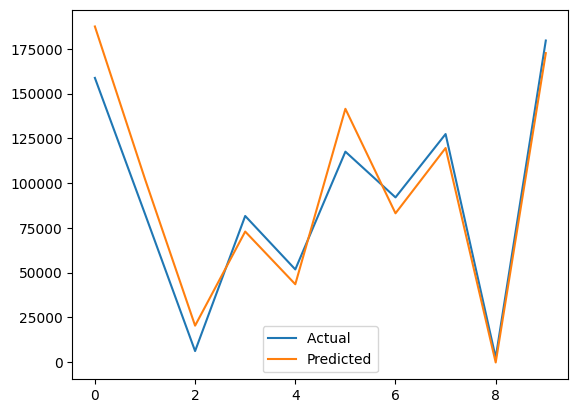

In [ ]:
# Lập biểu đồ dễ đánh giá
df_result.head(10).plot(kind = 'line')

In [ ]:
# Lưu mô hình vào file
with open('/content/drive/MyDrive/PTDLL_Nhóm 13/code và data/DATA/linear.pkl', 'wb') as file:
    pickle.dump(model, file)